**In this section we use Pyspark and databricks to operate efficiently on the large dataset.**

### Friends Graph Exploration

In [ ]:
!head Friends.csv

0,76561197999883107,76561198015117480,friend,2009-12-16 18:51:40,2013-06-25 08:26:24,
1,76561198002514375,76561198015117480,friend,2009-12-14 17:02:05,2013-06-25 08:26:24,
2,76561198005305156,76561198015117480,friend,2009-12-08 16:16:14,2013-06-25 08:26:24,
3,76561198014391711,76561198015117480,friend,2009-12-20 18:46:21,2013-06-25 08:26:24,
4,76561198015117480,76561198015374507,friend,2009-12-08 16:16:16,2013-06-25 08:26:24,
5,76561197960362327,76561198015117430,friend,2009-11-23 07:57:11,2013-06-25 08:26:18,
6,76561197960502537,76561198015117430,friend,2011-02-17 02:16:39,2013-06-25 08:26:18,
7,76561197965033642,76561198015117430,friend,2009-11-23 10:36:55,2013-06-25 08:26:18,
8,76561197966638212,76561198015117430,friend,2011-08-11 15:05:18,2013-06-25 08:26:18,
9,76561197968843796,76561198015117430,friend,2010-11-19 11:59:49,2013-06-25 08:26:18,


Loading all of the Graph data.

In [ ]:
from pyspark import SparkFiles
data_df = sqlContext.read.csv("file:///Friends.csv").toDF("ID", "FriendIDA", "FriendIDB", "type", "FriendSince", "LastCrawled", "Nothing")


In [ ]:
data_df.count()

Out[8]: 101538000

In [ ]:
data_df.columns

Out[9]: ['ID',
 'FriendIDA',
 'FriendIDB',
 'type',
 'FriendSince',
 'LastCrawled',
 'Nothing']

In [ ]:
data_df = data_df.drop("type", "LastCrawled", "Nothing")

Firstly, We get the degrees of each vertex, and plot that as a histogram. To do so, we need to define an associated parser for the data. As we try to get some idea of the relationship (as it's been observed that social networks have a nice relationship here). Grab each friend and unzip it accordingly. 


In [ ]:
from operator import add
data_unzipped = data_df.rdd.flatMap(lambda x: [(x[1],1), (x[2],1)]).reduceByKey(add)

In [ ]:
import matplotlib.pyplot as plt
data_2 = data_unzipped.map(lambda x: x[1])
hist = data_2.histogram([1,3,10,30,100,300,1000,3000,10000,30000,100000])

Here, we'll plot the binned degree-count relationship on a log-log graph. Here, we're looking to have nodes with high-degree, as that indicates that our sampled data was sampled appropriately.

Out[13]: Text(0.5, 0, 'Degree of Members in Graph')

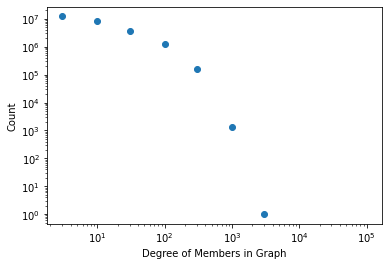

In [ ]:
plt.scatter(hist[0][1:],hist[1])
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Count")
plt.xlabel("Degree of Members in Graph")

This indicates that our sampling is good. Once we figure it out, we can display this data to look at different relationships and tell a store about STEAM friendships and Steam communities. 

It looks like we have a dense-enough network! In the future, we're probably going to use an even smaller subset, or work on tools to simplify the processing somewhat, but this is a good start with the EDA and demonstrates that this subsetting works, which is the most important point currently. 